In [1]:
#importar as bibliotecas que serão utilizadas
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

cwd = os.getcwd()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
#importando os dados com pd.read_csv e utilizaremos o usecols para selecionar somente as colunas necessárias para a análise
df = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep=';',encoding='ISO-8859-1', usecols=['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ST_CONCLUSAO','TP_PRESENCA_CN','TP_PRESENCA_CH','TP_ANO_CONCLUIU','TP_ESCOLA','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO','Q006','Q025'])

In [3]:
#visualizando os 5 primeiros registros do dataframe
df.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q006,Q025
0,190001595656,Sorocaba,SP,36.000,M,3,1,11,1,0,0,0,nan,nan,nan,nan,nan,nan,A,B
1,190001421546,Feira de Santana,BA,23.000,M,1,1,5,1,0,0,0,nan,nan,nan,nan,nan,nan,C,B
2,190001133210,Fortaleza,CE,39.000,F,3,1,13,1,0,0,0,nan,nan,nan,nan,nan,nan,B,B
3,190001199383,Palmas,TO,25.000,F,1,1,4,1,0,1,1,483.800,503.600,537.300,392.000,1.000,460.000,E,B
4,190001237802,Contagem,MG,22.000,F,1,1,4,1,0,1,1,513.600,575.500,570.700,677.000,1.000,860.000,G,B


In [4]:
#visualizando as colunas e os tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NO_MUNICIPIO_RESIDENCIA  object 
 2   SG_UF_RESIDENCIA         object 
 3   NU_IDADE                 float64
 4   TP_SEXO                  object 
 5   TP_COR_RACA              int64  
 6   TP_ST_CONCLUSAO          int64  
 7   TP_ANO_CONCLUIU          int64  
 8   TP_ESCOLA                int64  
 9   IN_TREINEIRO             int64  
 10  TP_PRESENCA_CN           int64  
 11  TP_PRESENCA_CH           int64  
 12  NU_NOTA_CN               float64
 13  NU_NOTA_CH               float64
 14  NU_NOTA_LC               float64
 15  NU_NOTA_MT               float64
 16  TP_STATUS_REDACAO        float64
 17  NU_NOTA_REDACAO          float64
 18  Q006                     object 
 19  Q025                     object 
dtypes: float64(7), int64(8), object(5)
memory usag

In [5]:
#exibe a quantidade de valores nulos em cada coluna
df.isnull().sum()

NU_INSCRICAO                     0
NO_MUNICIPIO_RESIDENCIA          0
SG_UF_RESIDENCIA                 0
NU_IDADE                        69
TP_SEXO                          0
TP_COR_RACA                      0
TP_ST_CONCLUSAO                  0
TP_ANO_CONCLUIU                  0
TP_ESCOLA                        0
IN_TREINEIRO                     0
TP_PRESENCA_CN                   0
TP_PRESENCA_CH                   0
NU_NOTA_CN                 1384837
NU_NOTA_CH                 1172125
NU_NOTA_LC                 1172125
NU_NOTA_MT                 1384837
TP_STATUS_REDACAO          1172126
NU_NOTA_REDACAO            1172126
Q006                             0
Q025                             0
dtype: int64

In [6]:
#remove os inscritos que não estiveram presentes em um dos dias do ENEM
df = df.loc[((df.TP_PRESENCA_CN == 1) & (df.TP_PRESENCA_CH == 1))]

In [7]:
#altera o valor das variáveis categóricas da coluna TP_COR_RACA
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

In [8]:
#altera o valor das variáveis categóricas da coluna TP_ST_CONCLUSAO
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].map({0:'Não informado', 1:'Já concluí o Ensino Médio', 2:'Estou cursando e concluirei o Ensino Médio em 2019', 3:'Estou cursando e concluirei o Ensino Médio após 2019', 4:'Não concluí e não estou cursando o Ensino Médio'})

In [9]:
#altera o valor das variáveis categóricas da coluna TP_ANO_CONCLUIU
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].map({0:'Não Informado', 1:'2018', 2:'2017', 3:'2016', 4:'2015', 5:'2014', 6:'2013', 7:'2012', 8:'2011', 9:'2010', 10:'2009', 11:'2008', 12:'2007', 13:'Antes de 2007'})

In [10]:
#altera o valor das variáveis categóricas da coluna TP_ESCOLA
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'Não Respondeu', 2:'Pública', 3:'Privada', 4:'Exterior'})

In [11]:
#altera o valor das variáveis categóricas da coluna IN_TREINEIRO
df['IN_TREINEIRO'] = df['IN_TREINEIRO'].map({0:'Não', 1:'Sim'})

In [12]:
#altera o valor das variáveis categóricas da coluna TP_STATUS_REDACAO
df['TP_STATUS_REDACAO'] = df['TP_STATUS_REDACAO'].map({0:'Não Identificado', 1:'Sem problemas', 2:'Anulada', 3:'Cópia Texto Motivador', 4:'Em Branco', 6:'Fuga ao tema', 7:'Não atendimento ao tipo textual', 8:'Texto insuficiente', 9:'Parte desconectada'})

In [13]:
#altera o valor das variáveis categóricas da coluna Q006
df['Q006'] = df['Q006'].map({'A':'Nenhuma renda', 'B':'Até 998,00', 'C':'De 998,01 até 1.497,00', 'D':'De 1.497,01 até 1.996,00', 'E':'De 1.996,01 até 2.495,00', 'F':'De 2.495,01 até 2.994,00', 'G':'De 2.994,01 até 3.992,00', 'H':'De 3.992,01 até 4.990,00', 'I':'De 4.990,01 até 5.988,00', 'J':'De 5.988,01 até 6.986,00', 'K':'De 6.986,01 até 7.984,00', 'L':'De 7.984,01 até 8.982,00', 'M':'De 8.982,01 até 9.980,00', 'N':'De 9.980,01 até 11.976,00', 'O':'De 11.976,01 até 14.970,00', 'P':'De 14.970,01 até 19.960,00', 'Q':'Mais de 19.960,00'})

In [14]:
#altera o valor das variáveis categóricas da coluna Q025
df['Q025'] = df['Q025'].map({'A':'Não', 'B':'Sim'})

In [15]:
#exibe a quantidade de valores nulos em cada coluna
df.isnull().sum()

NU_INSCRICAO                0
NO_MUNICIPIO_RESIDENCIA     0
SG_UF_RESIDENCIA            0
NU_IDADE                   60
TP_SEXO                     0
TP_COR_RACA                 0
TP_ST_CONCLUSAO             0
TP_ANO_CONCLUIU             0
TP_ESCOLA                   0
IN_TREINEIRO                0
TP_PRESENCA_CN              0
TP_PRESENCA_CH              0
NU_NOTA_CN                  0
NU_NOTA_CH                  0
NU_NOTA_LC                  0
NU_NOTA_MT                  0
TP_STATUS_REDACAO           1
NU_NOTA_REDACAO             1
Q006                        0
Q025                        0
dtype: int64

In [16]:
#Preenche os valores nulos
df['NU_IDADE'].fillna(0, inplace=True)

df['TP_ANO_CONCLUIU'].fillna(0, inplace=True)

df['NU_NOTA_CN'].fillna(0, inplace=True)

df['NU_NOTA_CH'].fillna(0, inplace=True)

df['NU_NOTA_LC'].fillna(0, inplace=True)

df['NU_NOTA_MT'].fillna(0, inplace=True)

df['TP_STATUS_REDACAO'].fillna(0, inplace=True)

df['NU_NOTA_REDACAO'].fillna(0, inplace=True)


In [17]:
#converte idade para int
df['NU_IDADE'] = df['NU_IDADE'].astype(int)

In [18]:
#cria coluna nota média baseada na soma das 4 provas
df['NOTA_MEDIA'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT']) / 4

In [19]:
df.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q006,Q025,NOTA_MEDIA
3,190001199383,Palmas,TO,25,F,Branca,Já concluí o Ensino Médio,2015,Não Respondeu,Não,1,1,483.800,503.600,537.300,392.000,Sem problemas,460.000,"De 1.996,01 até 2.495,00",Sim,479.175
4,190001237802,Contagem,MG,22,F,Branca,Já concluí o Ensino Médio,2015,Não Respondeu,Não,1,1,513.600,575.500,570.700,677.000,Sem problemas,860.000,"De 2.994,01 até 3.992,00",Sim,584.200
5,190001782198,Rondonópolis,MT,37,M,Preta,Já concluí o Ensino Médio,Antes de 2007,Não Respondeu,Não,1,1,563.700,644.900,564.200,675.300,Sem problemas,800.000,"De 1.996,01 até 2.495,00",Sim,612.025
6,190001421548,Paulo Afonso,BA,22,F,Parda,Já concluí o Ensino Médio,2014,Não Respondeu,Não,1,1,484.600,488.400,507.200,594.700,Sem problemas,600.000,"Até 998,00",Não,518.725
9,190001592266,São Paulo,SP,17,M,Branca,Estou cursando e concluirei o Ensino Médio em ...,Não Informado,Pública,Não,1,1,543.900,548.100,502.500,480.700,Sem problemas,400.000,"De 2.495,01 até 2.994,00",Sim,518.800


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702008 entries, 3 to 5095264
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NO_MUNICIPIO_RESIDENCIA  object 
 2   SG_UF_RESIDENCIA         object 
 3   NU_IDADE                 int32  
 4   TP_SEXO                  object 
 5   TP_COR_RACA              object 
 6   TP_ST_CONCLUSAO          object 
 7   TP_ANO_CONCLUIU          object 
 8   TP_ESCOLA                object 
 9   IN_TREINEIRO             object 
 10  TP_PRESENCA_CN           int64  
 11  TP_PRESENCA_CH           int64  
 12  NU_NOTA_CN               float64
 13  NU_NOTA_CH               float64
 14  NU_NOTA_LC               float64
 15  NU_NOTA_MT               float64
 16  TP_STATUS_REDACAO        object 
 17  NU_NOTA_REDACAO          float64
 18  Q006                     object 
 19  Q025                     object 
 20  NOTA_MEDIA               float64
dtypes: float

In [21]:
#exibe a quantidade de valores nulos em cada coluna
df.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
SG_UF_RESIDENCIA           0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
TP_ST_CONCLUSAO            0
TP_ANO_CONCLUIU            0
TP_ESCOLA                  0
IN_TREINEIRO               0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_LC                 0
NU_NOTA_MT                 0
TP_STATUS_REDACAO          0
NU_NOTA_REDACAO            0
Q006                       0
Q025                       0
NOTA_MEDIA                 0
dtype: int64

In [22]:
#exibe a quantidade de linhas e colunas do Dataframe
df.shape

(3702008, 21)

In [23]:
#porcentagem de participantes por estado
df['SG_UF_RESIDENCIA'].value_counts()/df.shape[0]*100

SP   15.699
MG   10.618
BA    7.813
RJ    6.600
CE    5.995
PA    5.613
PE    5.477
MA    4.431
RS    4.215
PR    4.064
GO    3.342
PB    3.081
PI    2.546
RN    2.441
SC    2.138
AM    2.012
ES    1.955
AL    1.857
DF    1.802
MT    1.633
SE    1.564
MS    1.317
RO    1.104
TO    0.913
AP    0.798
AC    0.733
RR    0.238
Name: SG_UF_RESIDENCIA, dtype: float64

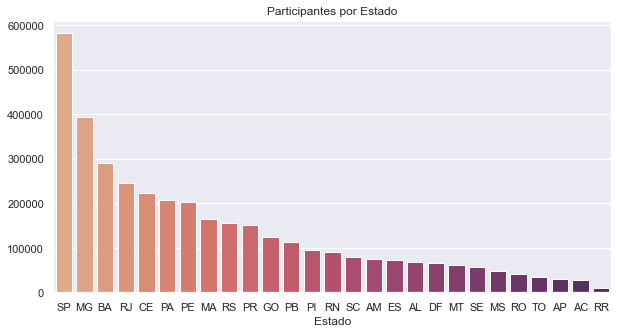

In [24]:
#quantidade de participantes por estado
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='SG_UF_RESIDENCIA',data=df,palette='flare',order = df['SG_UF_RESIDENCIA'].value_counts().index)
plt.xlabel('Estado')
plt.ylabel("")
plt.title('Participantes por Estado')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [25]:
#porcentagem de participantes por sexo
df['TP_SEXO'].value_counts()/df.shape[0]*100

F   59.460
M   40.540
Name: TP_SEXO, dtype: float64

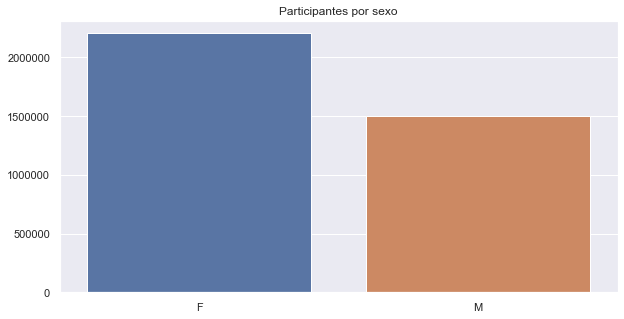

In [44]:
#quantidade de participantes por sexo
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='TP_SEXO',data=df,order = df['TP_SEXO'].value_counts().index)
plt.xlabel('')
plt.ylabel("")
plt.title('Participantes por sexo')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [28]:
#porcentagem de participantes por renda familiar
df['Q006'].value_counts()/df.shape[0]*100

De 998,01 até 1.497,00       24.446
Até 998,00                   24.104
De 1.497,01 até 1.996,00      9.640
De 1.996,01 até 2.495,00      9.346
De 2.994,01 até 3.992,00      6.329
De 2.495,01 até 2.994,00      4.651
Nenhuma renda                 4.270
De 3.992,01 até 4.990,00      4.181
De 4.990,01 até 5.988,00      3.186
De 5.988,01 até 6.986,00      1.803
De 9.980,01 até 11.976,00     1.395
De 6.986,01 até 7.984,00      1.311
Mais de 19.960,00             1.260
De 11.976,01 até 14.970,00    1.132
De 7.984,01 até 8.982,00      0.994
De 8.982,01 até 9.980,00      0.975
De 14.970,01 até 19.960,00    0.975
Name: Q006, dtype: float64

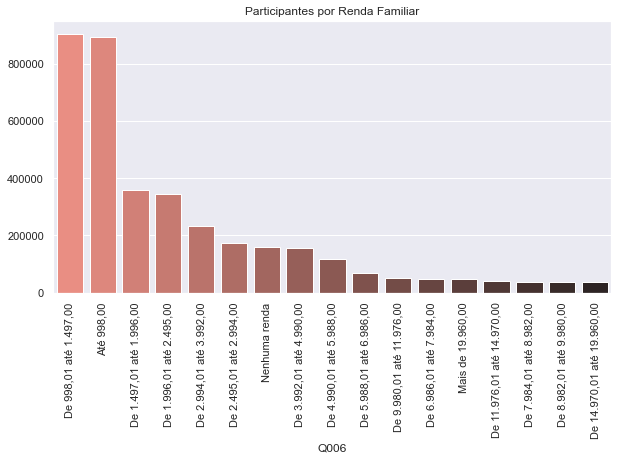

In [43]:
#quantidade de participantes por renda familiar
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Q006',data=df,palette='dark:salmon_r', order = df['Q006'].value_counts().index)
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel("")
plt.title('Participantes por Renda Familiar')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [30]:
#porcentagem de participantes por raça/cor
df['TP_COR_RACA'].value_counts()/df.shape[0]*100

Parda           45.763
Branca          37.140
Preta           12.243
Amarela          2.289
Não declarado    1.984
Indígena         0.581
Name: TP_COR_RACA, dtype: float64

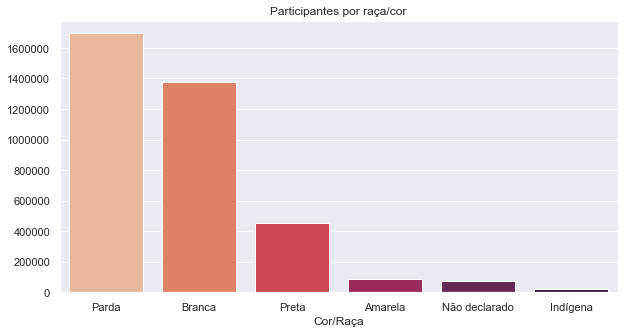

In [31]:
#quantidade de participantes por raça/cor
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='TP_COR_RACA',data=df,palette='rocket_r',order = df['TP_COR_RACA'].value_counts().index)
plt.xlabel('')
plt.ylabel("")
plt.title('Participantes por raça/cor')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [32]:
#distribuição de participantes por tipo de escola
df['TP_ESCOLA'].value_counts()/df.shape[0]*100

Não Respondeu   67.122
Pública         27.279
Privada          5.600
Name: TP_ESCOLA, dtype: float64

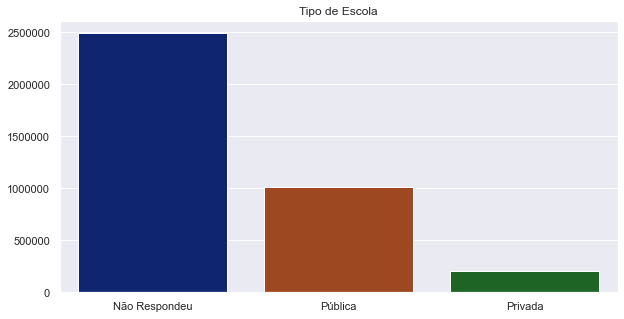

In [33]:
#distribuição de participantes por tipo de escola
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='TP_ESCOLA',data=df,palette='dark',order = df['TP_ESCOLA'].value_counts().index)
plt.xlabel('')
plt.ylabel("")
plt.title('Tipo de Escola')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [34]:
#Possui internet em casa?
df['Q025'].value_counts()/df.shape[0]*100

Sim   78.877
Não   21.123
Name: Q025, dtype: float64

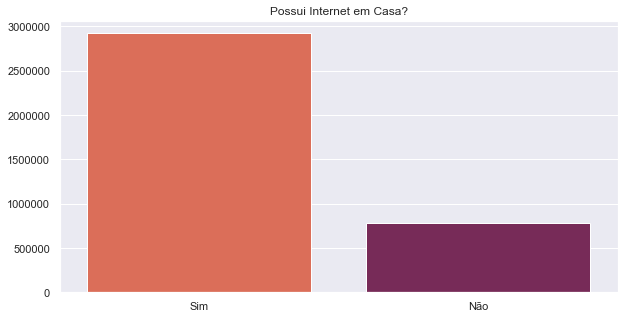

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Q025',data=df,palette='rocket_r',order = df['Q025'].value_counts().index)
plt.ylabel("")
plt.xlabel("")
plt.title('Possui Internet em Casa?')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

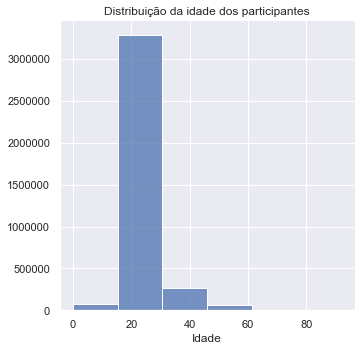

In [36]:
sns.displot(x='NU_IDADE',data=df,bins=6)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("")
plt.xlabel("Idade")
plt.title('Distribuição da idade dos participantes')
plt.show()

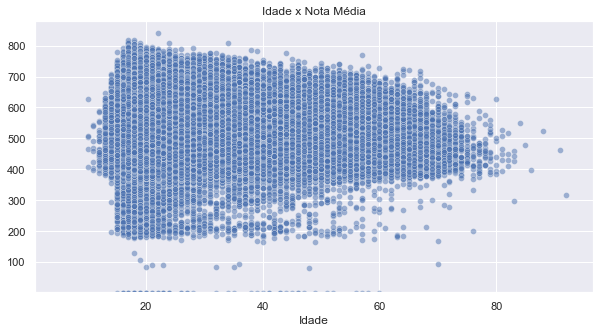

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df, x='NU_IDADE',y='NOTA_MEDIA',alpha=0.5)
plt.title("Idade x Nota Média")
plt.xlabel("Idade")
plt.ylabel("")
plt.ylim(1)
plt.xlim(1)
plt.show()

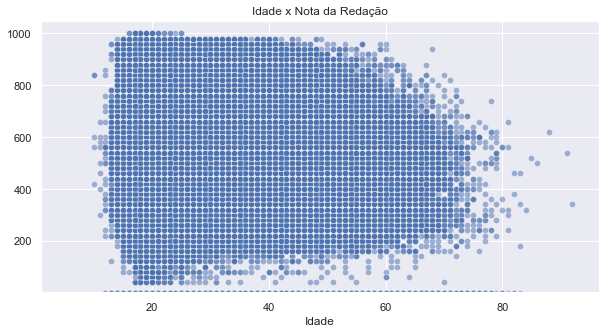

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df, x='NU_IDADE',y='NU_NOTA_REDACAO',alpha=0.5)
plt.title("Idade x Nota da Redação")
plt.xlabel("Idade")
plt.ylabel("")
plt.ylim(1)
plt.xlim(1)
plt.show()

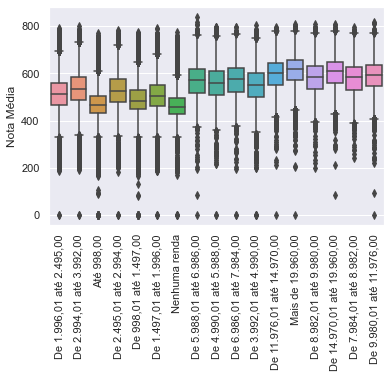

In [39]:
sns.boxplot(x=df['Q006'], y=df['NOTA_MEDIA'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota Média")
plt.show()

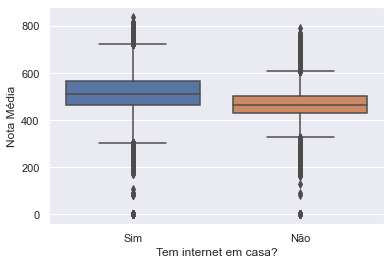

In [40]:
sns.boxplot(x=df['Q025'], y=df['NOTA_MEDIA'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota Média")
plt.show()

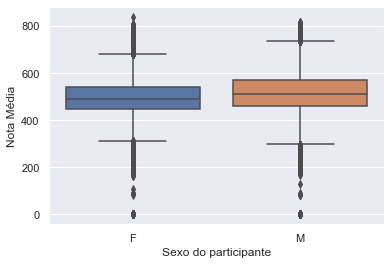

In [41]:
sns.boxplot(x=df['TP_SEXO'], y=df['NOTA_MEDIA'])
plt.xlabel("Sexo do participante")
plt.ylabel("Nota Média")
plt.show()

In [42]:
df.describe()

,NU_INSCRICAO,NU_IDADE,TP_PRESENCA_CN,TP_PRESENCA_CH,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_MEDIA
count,3702008.000,3702008.000,3702008.000,3702008.000,3702008.000,3702008.000,3702008.000,3702008.000,3702008.000,3702008.000
mean,190003476812.637,21.171,1.000,1.000,477.883,509.891,522.397,523.185,579.769,508.339
std,1451334.051,6.953,0.000,0.000,76.046,80.979,62.749,109.025,182.512,70.587
min,190001004627.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,190002220335.250,17.000,1.000,1.000,417.800,450.800,485.500,435.200,500.000,453.919
50%,190003455855.500,19.000,1.000,1.000,470.300,513.400,527.800,501.100,580.000,498.300
75%,190004703355.250,22.000,1.000,1.000,533.200,568.600,566.600,597.900,680.000,555.631
max,190006129593.000,92.000,1.000,1.000,860.900,835.100,801.700,985.500,1000.000,839.875
